In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import yaml
import sqlalchemy

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acjimenez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
# Lenght
# Total number of tweets
# Most common words
# Most common words withouth stop words
# Most common non english words
# Most common subjects 

In [3]:
def process_yaml(key_name):    
    with open("../../credentials/config.yaml", 'r') as file:
        return yaml.safe_load(file)[key_name]

In [4]:
def get_enginesql():
    config = process_yaml('mysql_conn')
    engine = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(config['user'], config['password'], config['host'], config['database']))
    return engine    

In [5]:
path = process_yaml('root_file')
os.chdir(path['path'])

In [6]:
query = "SELECT tweet.id, tweet.tweet_id, tweet.original_text, tweet.cleaned_text, tweet.token_tweet, tweet.author_id, tweet.conversation_id,  tweet.in_reply_to_user_id, tweet.lang, tweet.created_at, tweet.place_id, tweet.original_folder, tweet.key_name FROM mydissertation.tweet;"
df_tweets = pd.read_sql_query(query, get_enginesql())

In [7]:
display(df_tweets.head(2))
display(df_tweets.tail(2))

,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at,place_id,original_folder,key_name
0,1,1257723680702021640,b'We could have both the flu and Covid-19 in o...,We could have both the flu and Covid-19 in our...,"we, could, have, both, the, flu, and, covid, i...",6751502,1257723680702021640,None,en,2020-05-05 17:27:47,None,tweets_politics\2020-05-05,data
1,2,1257621614516109312,"b'""We cannot afford to have both the winter fl...","""We cannot afford to have both the winter flu ...","we, cannot, afford, to, have, both, the, winte...",6751502,1257621614516109312,None,en,2020-05-05 10:42:13,None,tweets_politics\2020-05-05,data


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at,place_id,original_folder,key_name
38723,38724,1395131095063093254,b'So granny -fully vaccinated - brings her gra...,So granny -fully vaccinated - brings her grand...,"so, granny, fully, vaccinated, brings, her, gr...",87812900,1395131095063093254,None,en,2021-05-19 21:35:48,None,tweets_general\2021-05-20,tweets
38724,38725,1395096789490020368,"b""I went to Walmart early today. I am fully v...",I went to Walmart early today. I am fully vacc...,"i, went, to, walmart, early, today, i, am, ful...",860654500431880192,1395096789490020368,None,en,2021-05-19 19:19:28,None,tweets_general\2021-05-20,tweets


In [14]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38725 entries, 0 to 38724
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38725 non-null  int64         
 1   tweet_id             38725 non-null  object        
 2   original_text        38725 non-null  object        
 3   cleaned_text         38725 non-null  object        
 4   token_tweet          38725 non-null  object        
 5   author_id            38725 non-null  object        
 6   conversation_id      38725 non-null  object        
 7   in_reply_to_user_id  21157 non-null  object        
 8   lang                 38725 non-null  object        
 9   created_at           38725 non-null  datetime64[ns]
 10  place_id             5424 non-null   object        
 11  original_folder      38725 non-null  object        
 12  key_name             38725 non-null  object        
dtypes: datetime64[ns](1), int64(1),

In [21]:
df_tweets.duplicated(subset=['token_tweet']).sum()

6806

In [23]:
df_tweets[~df_tweets.duplicated(subset=['token_tweet'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31919 entries, 0 to 38724
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   31919 non-null  int64         
 1   tweet_id             31919 non-null  object        
 2   original_text        31919 non-null  object        
 3   cleaned_text         31919 non-null  object        
 4   token_tweet          31919 non-null  object        
 5   author_id            31919 non-null  object        
 6   conversation_id      31919 non-null  object        
 7   in_reply_to_user_id  18857 non-null  object        
 8   lang                 31919 non-null  object        
 9   created_at           31919 non-null  datetime64[ns]
 10  place_id             5295 non-null   object        
 11  original_folder      31919 non-null  object        
 12  key_name             31919 non-null  object        
dtypes: datetime64[ns](1), int64(1),

In [24]:
query = "SELECT `place`.`place_id`, `place`.`name`, `place`.`country` FROM `mydissertation`.`place`;"
df_places = pd.read_sql_query(query, get_enginesql())

In [25]:
df_places.head(5)

,place_id,name,country
0,001907e868d06e24,Dubai,United Arab Emirates
1,003253f0107acd32,Dublin,United States
2,0118c71c0ed41109,Perth (WA),Australia
3,0239f5fd632185d5,Wexford,Ireland
4,07d9c93cbb087000,Aviva Stadium,Ireland


In [26]:
query = "SELECT `user`.`author_id`, `user`.`username`, `user`.`name`, `user`.`verifed`, `user`.`created_at` FROM `mydissertation`.`user`;"
df_users = pd.read_sql_query(query, get_enginesql())

In [27]:
df_users.head(5)

,author_id,username,name,verifed,created_at
0,1000083496495468544,erinoshaga,erin,0,2018-05-25 18:37:41
1,1000338924,dr_smullen,Stephen Mullen,0,2012-12-09 22:33:05
2,1000348075,susankeoghnews,Susan Keogh,1,2012-12-09 22:28:52
3,1000504050390126592,Peterblake35,Peter blake,0,2018-05-26 22:28:48
4,1001132766027812864,LifeandtimesM,Wayne,0,2018-05-28 16:07:06


In [28]:
query = "SELECT `hashtag`.`id`, `hashtag`.`name` FROM `mydissertation`.`hashtag`;"
df_hashtags = pd.read_sql_query(query, get_enginesql())

In [29]:
df_hashtags.head(5)

,id,name
0,1,leaders
1,2,covid19
2,3,flu
3,4,paystudentnursesandmidwives
4,5,stopthespread


In [30]:
# The lenght of the tweet without puntations, just words
df_tweets['tweet_len'] = df_tweets['token_tweet'].str.replace(',','').replace(' ', '').apply(len)

# delete token zero
cond = df_tweets['tweet_len'] == 0
df_tweets = df_tweets[~cond]

# delete duplicate text
df_tweets = df_tweets[~df_tweets.duplicated(subset=['token_tweet'])]

# The lenght of the tweet without puntations, just words
df_tweets['token_tweet'] = df_tweets['token_tweet'].str.split(',')
df_tweets['token_tweet'] = df_tweets['token_tweet'].apply(lambda x: [y.strip().replace(' ', '') for y in x])
df_tweets['word_count'] = df_tweets['token_tweet'].apply(len)

# Remove tweets no english
cond = df_tweets['lang'] == 'en'
df_tweets = df_tweets[cond]

# merge
df_tweets = df_tweets.merge(df_users, how='left', on='author_id')
df_tweets = df_tweets.merge(df_places, how='left', on='place_id')
df_tweets.head(2)

,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,original_folder,key_name,tweet_len,word_count,username,name_x,verifed,created_at_y,name_y,country
0,1,1257723680702021640,b'We could have both the flu and Covid-19 in o...,We could have both the flu and Covid-19 in our...,"[we, could, have, both, the, flu, and, covid, ...",6751502,1257723680702021640,None,en,2020-05-05 17:27:47,...,tweets_politics\2020-05-05,data,241,49,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN
1,2,1257621614516109312,"b'""We cannot afford to have both the winter fl...","""We cannot afford to have both the winter flu ...","[we, cannot, afford, to, have, both, the, wint...",6751502,1257621614516109312,None,en,2020-05-05 10:42:13,...,tweets_politics\2020-05-05,data,201,38,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN


In [31]:
# Remove tweets from different places
cond = (~df_tweets['country'].isna()) & (df_tweets['country'] != 'Ireland')
df_tweets = df_tweets[~cond]
df_tweets.head(2)

,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,original_folder,key_name,tweet_len,word_count,username,name_x,verifed,created_at_y,name_y,country
0,1,1257723680702021640,b'We could have both the flu and Covid-19 in o...,We could have both the flu and Covid-19 in our...,"[we, could, have, both, the, flu, and, covid, ...",6751502,1257723680702021640,None,en,2020-05-05 17:27:47,...,tweets_politics\2020-05-05,data,241,49,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN
1,2,1257621614516109312,"b'""We cannot afford to have both the winter fl...","""We cannot afford to have both the winter flu ...","[we, cannot, afford, to, have, both, the, wint...",6751502,1257621614516109312,None,en,2020-05-05 10:42:13,...,tweets_politics\2020-05-05,data,201,38,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN


In [32]:
df_tweets['user_category'] = df_tweets['original_folder'].str.split("\\").apply(lambda x:x[0].replace('tweets_',''))

In [33]:
print(df_tweets.shape)
display(df_tweets.head(2))

(31533, 22)


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,key_name,tweet_len,word_count,username,name_x,verifed,created_at_y,name_y,country,user_category
0,1,1257723680702021640,b'We could have both the flu and Covid-19 in o...,We could have both the flu and Covid-19 in our...,"[we, could, have, both, the, flu, and, covid, ...",6751502,1257723680702021640,None,en,2020-05-05 17:27:47,...,data,241,49,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN,politics
1,2,1257621614516109312,"b'""We cannot afford to have both the winter fl...","""We cannot afford to have both the winter flu ...","[we, cannot, afford, to, have, both, the, wint...",6751502,1257621614516109312,None,en,2020-05-05 10:42:13,...,data,201,38,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN,politics


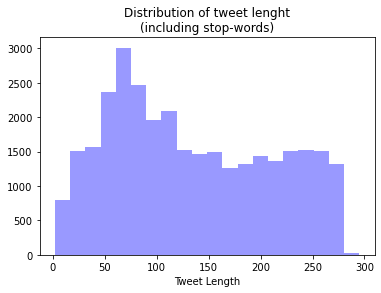

Basic statistics--------------------
max: 295
min: 2
mode: 72


In [62]:
# No duplicates, no zero lenght
# No puntuation
sns.distplot(df_tweets['tweet_len'], bins=20, kde=False, color='blue')
plt.title("Distribution of tweet lenght\n(including stop-words)")
plt.xlabel("Tweet Length")
plt.show()
print("Basic statistics--------------------")
print('max:', df_tweets['tweet_len'].max())
print('min:', df_tweets['tweet_len'].min())
print('mode:', df_tweets['tweet_len'].mode()[0])

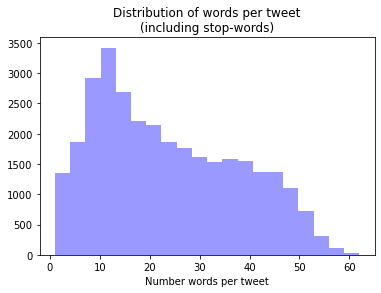

Basic statistics--------------------
max: 62
min: 1
mode: 12


In [63]:
# No duplicates, no zero lenght, no spaces
sns.distplot(df_tweets['word_count'], bins=20, kde=False, color='blue')
plt.title("Distribution of words per tweet\n(including stop-words)")
plt.xlabel("Number words per tweet")
plt.show()
print("Basic statistics--------------------")
print('max:', df_tweets['word_count'].max())
print('min:', df_tweets['word_count'].min())
print('mode:', df_tweets['word_count'].mode()[0])

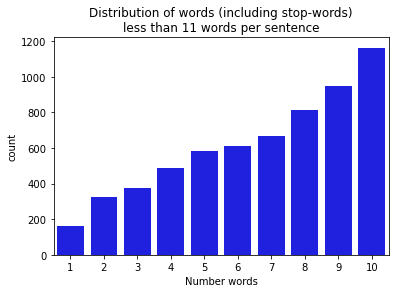

In [64]:
# No duplicates, no zero lenght
sns.countplot(data=df_tweets[df_tweets['word_count']<=10], x='word_count', color='blue')
plt.title("Distribution of words (including stop-words)\nless than 11 words per sentence")
plt.xlabel("Number words")
plt.show()

[]

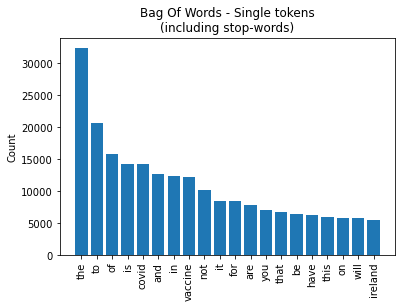

In [131]:
# unigram without stop words

vect = CountVectorizer(max_features=50)
vect.fit(df_tweets['token_tweet'].apply(lambda x: ' '.join(x)))

X = vect.transform(df_tweets['token_tweet'].apply(lambda x: ' '.join(x)))
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
top20_words_big = X_df.apply(sum,axis=0).sort_values(ascending=False)[:20]

plt.bar(top20_words_big.index, top20_words_big.values)
plt.title("Bag Of Words - Single tokens\n(including stop-words)")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

[]

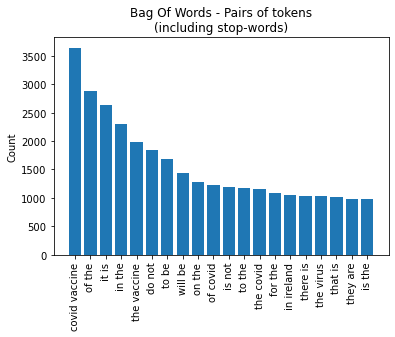

In [134]:
# bi-gram without stop words

vect = CountVectorizer(max_features=50, ngram_range=(2, 2))
vect.fit(df_tweets['token_tweet'].apply(lambda x: ' '.join(x)))
X = vect.transform(df_tweets['token_tweet'].apply(lambda x: ' '.join(x)))
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
top20_words_trig = X_df.apply(sum,axis=0).sort_values(ascending=False)[:20]

plt.bar(top20_words_trig.index, top20_words_trig.values)
plt.title("Bag Of Words - Pairs of tokens\n(including stop-words)")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

[]

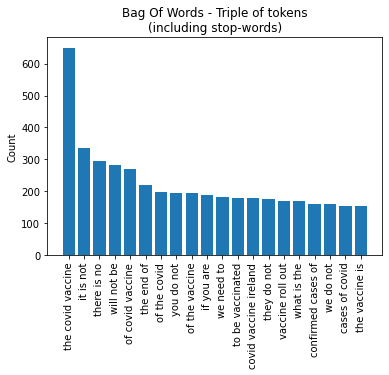

In [135]:
# tri-gram without stop words

vect = CountVectorizer(max_features=50, ngram_range=(3, 3))
vect.fit(df_tweets['token_tweet'].apply(lambda x: ' '.join(x)))
X = vect.transform(df_tweets['token_tweet'].apply(lambda x: ' '.join(x)))
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
top20_words_trig = X_df.apply(sum,axis=0).sort_values(ascending=False)[:20]

plt.bar(top20_words_trig.index, top20_words_trig.values)
plt.title("Bag Of Words - Triple of tokens\n(including stop-words)")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

In [67]:
stop_words = set(stopwords.words('english'))
df_tweets['token_tweet_nostop'] = df_tweets['token_tweet'].apply(lambda x: [item for item in x if not item in stop_words])
df_tweets['word_count_nostop'] = df_tweets['token_tweet_nostop'].apply(len)

#df_tweets[['token_tweet', 'token_tweet_nostop', 'word_count', 'word_count_nostop']]

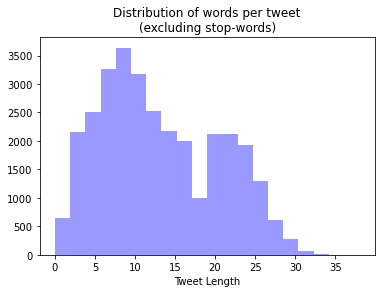

Basic statistics--------------------
max: 38
min: 0
mode: 8


In [129]:
# No duplicates, no zero lenght, no stop words
sns.distplot(df_tweets['word_count_nostop'], bins=20, kde=False, color='blue')
plt.title("Distribution of words per tweet\n(excluding stop-words)")
plt.xlabel("Tweet Length")
plt.show()
print("Basic statistics--------------------")
print('max:', df_tweets['word_count_nostop'].max())
print('min:', df_tweets['word_count_nostop'].min())
print('mode:', df_tweets['word_count_nostop'].mode()[0])

[]

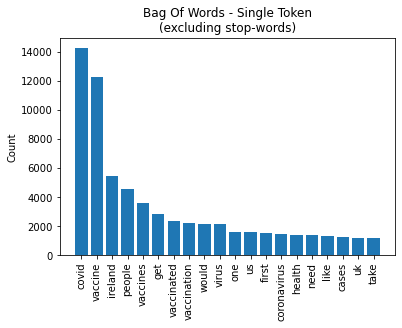

In [136]:
# uni-gram without stop words
vect = CountVectorizer(max_features=50)
vect.fit(df_tweets['token_tweet_nostop'].apply(lambda x: ' '.join(x)))
X = vect.transform(df_tweets['token_tweet_nostop'].apply(lambda x: ' '.join(x)))
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
top20_words_nonstop = X_df.apply(sum,axis=0).sort_values(ascending=False)[:20]

plt.bar(top20_words_nonstop.index, top20_words_nonstop.values)
plt.title("Bag Of Words - Single Token\n(excluding stop-words)")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

[]

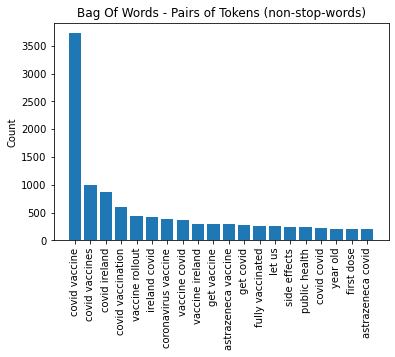

In [71]:
# bi-gram without stop words
vect = CountVectorizer(max_features=20, ngram_range=(2, 2))
vect.fit(df_tweets['token_tweet_nostop'].apply(lambda x: ' '.join(x)))
X = vect.transform(df_tweets['token_tweet_nostop'].apply(lambda x: ' '.join(x)))
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
top20_words_big_nonstop = X_df.apply(sum,axis=0).sort_values(ascending=False)[:20]

plt.bar(top20_words_big_nonstop.index, top20_words_big_nonstop.values)
plt.title("Bag Of Words - Pairs of Tokens (non-stop-words)")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

[]

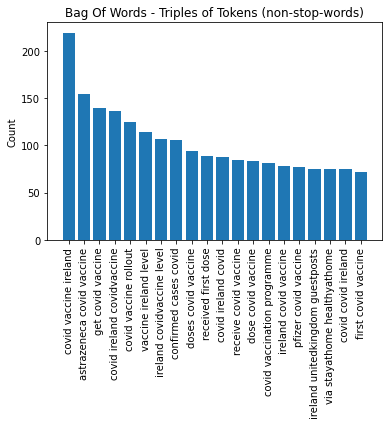

In [72]:
# bi-gram without stop words

vect = CountVectorizer(max_features=50, ngram_range=(3, 3))
vect.fit(df_tweets['token_tweet_nostop'].apply(lambda x: ' '.join(x)))
X = vect.transform(df_tweets['token_tweet_nostop'].apply(lambda x: ' '.join(x)))
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
top20_words_trig_nonstop = X_df.apply(sum,axis=0).sort_values(ascending=False)[:20]

plt.bar(top20_words_trig_nonstop.index, top20_words_trig_nonstop.values)
plt.title("Bag Of Words - Triples of Tokens (non-stop-words)")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

In [73]:
df_tweets['user_category'].unique()

array(['politics', 'media', 'health_system', 'politics_replies',
       'media_replies', 'health_system_replies', 'politics_to',
       'media_to', 'health_system_to', 'general'], dtype=object)

(166, 24)


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,word_count,username,name_x,verifed,created_at_y,name_y,country,user_category,token_tweet_nostop,word_count_nostop
0,1,1257723680702021640,b'We could have both the flu and Covid-19 in o...,We could have both the flu and Covid-19 in our...,"[we, could, have, both, the, flu, and, covid, ...",6751502,1257723680702021640,None,en,2020-05-05 17:27:47,...,49,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN,politics,"[could, flu, covid, hospitals, coming, winter,...",25
1,2,1257621614516109312,"b'""We cannot afford to have both the winter fl...","""We cannot afford to have both the winter flu ...","[we, cannot, afford, to, have, both, the, wint...",6751502,1257621614516109312,None,en,2020-05-05 10:42:13,...,38,labour,The Labour Party,1.0,2007-06-11 19:58:24,NaN,NaN,politics,"[cannot, afford, winter, flu, covid, rampant, ...",18


[]

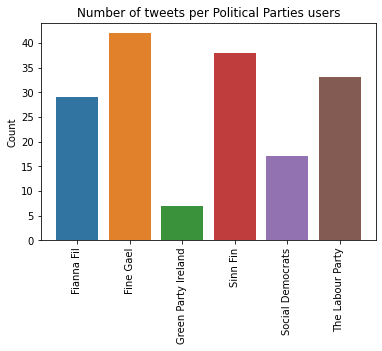

In [83]:
# Users from political parties
user_politics = "(to:sinnfeinireland OR to:fiannafailparty OR to:greenparty_ie OR to:NationalPartyIE OR to:FineGael OR to:labour OR to:SocDems)"
user_politics = user_politics.replace('to:','')
user_politics = user_politics.replace('(','')
user_politics = user_politics.replace(')','')
user_politics = user_politics.split('OR')
user_politics = [x.strip() for x in user_politics]

cond = (df_tweets['username'].isin(pd.Series(user_politics))) & \
    (df_tweets['in_reply_to_user_id'] != np.nan) & \
        ((df_tweets['tweet_id'] == df_tweets['conversation_id']) | (df_tweets['author_id'] == df_tweets['in_reply_to_user_id']))
df_tweets_p = df_tweets[cond]
print(df_tweets_p.shape)
display(df_tweets_p.head(2))

sns.countplot(x='name_x', data=df_tweets_p.sort_values(by='name_x'))
plt.title("Number of tweets per Political Parties users")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

(4719, 24)


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,word_count,username,name_x,verifed,created_at_y,name_y,country,user_category,token_tweet_nostop,word_count_nostop
78,80,1390308409744924677,"b'""We shouldn\xe2\x80\x99t have to wait for th...","""We should not have to wait for the US to give...","[we, should, not, have, to, wait, for, the, us...",150246405,1390308409744924677,None,en,2021-05-06 14:12:10,...,29,thejournal_ie,TheJournal.ie,1.0,2010-05-31 13:08:52,NaN,NaN,politics,"[wait, us, give, us, permission, take, moral, ...",17
90,92,1220390836292194304,b'Coronavirus outbreak: Four people tested in ...,Coronavirus outbreak: Four people tested in Sc...,"[coronavirus, outbreak, four, people, tested, ...",91334232,1220390836292194304,None,en,2020-01-23 17:00:23,...,17,Independent_ie,Independent.ie,1.0,2009-11-20 12:55:30,NaN,NaN,media,"[coronavirus, outbreak, four, people, tested, ...",13


[]

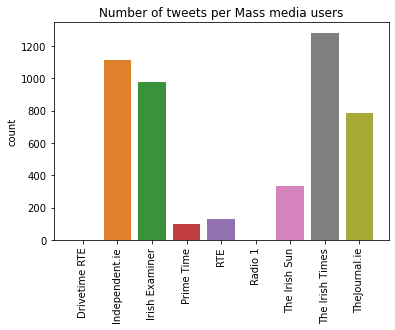

In [81]:
# Users from political parties
user_media = "(to:rte OR to:RTE_PrimeTime OR to:drivetimerte OR to:RTERadio1 OR to:Independent_ie OR to:NewstalkFMOR OR to:IrishSunOnline OR to:IrishTimes OR to:IrishTimesNews OR to:thejournal_ie OR to:irishexaminer OR to:IsFearrAnStar)"
user_media = user_media.replace('to:','')
user_media = user_media.replace('(','')
user_media = user_media.replace(')','')
user_media = user_media.split('OR')
user_media = [x.strip().lower() for x in user_media]

cond = (df_tweets['username'].str.lower().isin(pd.Series(user_media))) & \
    (df_tweets['in_reply_to_user_id'] != np.nan) & \
        ((df_tweets['tweet_id'] == df_tweets['conversation_id']) | (df_tweets['author_id'] == df_tweets['in_reply_to_user_id']))
df_tweets_m = df_tweets[cond]
print(df_tweets_m.shape)
display(df_tweets_m.head(2))

sns.countplot(x='name_x', data=df_tweets_m.sort_values(by='name_x'))
plt.title("Number of tweets per Mass media users")
plt.xlabel("")
plt.xticks(rotation=90)
plt.plot()

(593, 24)


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,word_count,username,name_x,verifed,created_at_y,name_y,country,user_category,token_tweet_nostop,word_count_nostop
3400,3711,1238045821209206786,b'All students in first year of secondary scho...,All students in first year of secondary school...,"[all, students, in, first, year, of, secondary...",69298376,1238045821209206786,None,en,2020-03-12 10:15:00,...,43,HSELive,HSE Ireland,1.0,2009-08-27 14:03:51,NaN,NaN,health_system,"[students, first, year, secondary, school, off...",23
3401,3712,1319329922888822784,"b'HPV stands for human papillomavirus, which i...","HPV stands for human papillomavirus, which is ...","[hpv, stands, for, human, papillomavirus, whic...",69298376,1319329922888822784,None,en,2020-10-22 17:29:00,...,43,HSELive,HSE Ireland,1.0,2009-08-27 14:03:51,NaN,NaN,health_system,"[hpv, stands, human, papillomavirus, name, gro...",24


[]

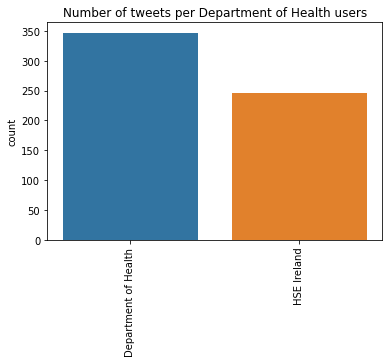

In [82]:
# Users from political parties
user_health = "(to:HSELive OR to:roinnslainte)"
user_health = user_health.replace('to:','')
user_health = user_health.replace('(','')
user_health = user_health.replace(')','')
user_health = user_health.split('OR')
user_health = [x.strip().lower() for x in user_health]

cond = (df_tweets['username'].str.lower().isin(pd.Series(user_health))) & \
    (df_tweets['in_reply_to_user_id'] != np.nan) & \
        ((df_tweets['tweet_id'] == df_tweets['conversation_id']) | (df_tweets['author_id'] == df_tweets['in_reply_to_user_id']))
df_tweets_h = df_tweets[cond]
print(df_tweets_h.shape)
display(df_tweets_h.head(2))

sns.countplot(x='name_x', data=df_tweets_h.sort_values(by='name_x'))
plt.title("Number of tweets per Department of Health users")
plt.xlabel("")
plt.xticks(rotation=90)
plt.plot()

(430, 28)


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,created_at_y,name_y,country,user_category,token_tweet_nostop,word_count_nostop,username_y,name,verifed_y,created_at
0,4329,1257724127990906880,"b""@labour Why don't you ask questions about wh...",Why do not you ask questions about who release...,"[why, do, not, you, ask, questions, about, who...",934243153191886854,1257723680702021640,6751502,en,2020-05-05 17:29:34,...,2017-11-25 02:11:39,NaN,NaN,politics_replies,"[ask, questions, released, virus]",4,labour,The Labour Party,1,2007-06-11 19:58:24
1,4330,1328420238908600320,b'@sinnfeinireland @davidcullinane Keep the ha...,Keep the hatches battened down until these vac...,"[keep, the, hatches, battened, down, until, th...",43987291,1328408807886745600,22628924,en,2020-11-16 19:30:40,...,2009-06-01 22:17:19,NaN,NaN,politics_replies,"[keep, hatches, battened, vaccines, widely, av...",13,sinnfeinireland,Sinn Fin,1,2009-03-03 14:34:45


[]

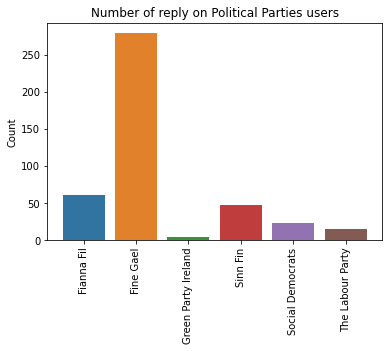

In [84]:
in_reply = df_users[df_users.username.isin(pd.Series(user_politics))].author_id

cond = (~df_tweets.in_reply_to_user_id.isna()) & (df_tweets['in_reply_to_user_id'].isin(in_reply) & (df_tweets['in_reply_to_user_id']!=df_tweets['author_id']))
dt_tweet_p_replies = df_tweets[cond]

dt_tweet_p_replies = dt_tweet_p_replies.merge(df_users.rename(columns={'author_id':'in_reply_to_user_id'}), how='left', on='in_reply_to_user_id')

print(dt_tweet_p_replies.shape)
display(dt_tweet_p_replies.head(2))

sns.countplot(x='name', data=dt_tweet_p_replies.sort_values(by='name'))
plt.title("Number of reply on Political Parties users")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

(7505, 28)


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,created_at_y,name_y,country,user_category,token_tweet_nostop,word_count_nostop,username_y,name,verifed_y,created_at
0,4861,1233296276554440704,"b""@Independent_ie Fuck fear, you are only as s...","Fuck fear, you are only as safe as the most un...","[fuck, fear, you, are, only, as, safe, as, the...",1224684444356956167,1233293297285771268,91334232,en,2020-02-28 07:42:00,...,2020-02-04 13:22:08,NaN,NaN,media_replies,"[fuck, fear, safe, uninsured, poor, people, pl...",20,Independent_ie,Independent.ie,1,2009-11-20 12:55:30
1,4862,1237474401500749824,"b""@irishexaminer Europe is completely infected...",Europe is completely infected and they only no...,"[europe, is, completely, infected, and, they, ...",223770689,1237472177135316992,19903360,en,2020-03-10 20:24:23,...,2010-12-07 08:37:42,NaN,NaN,media_replies,"[europe, completely, infected, agree, fund, re...",9,irishexaminer,Irish Examiner,1,2009-02-02 12:01:29


[]

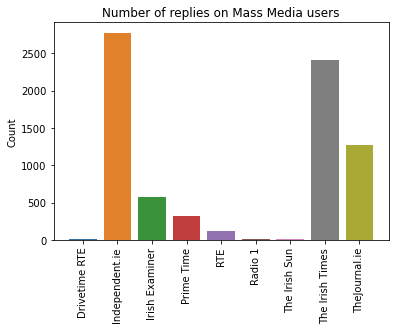

In [85]:
in_reply = df_users[df_users.username.str.lower().isin(pd.Series(user_media))].author_id

cond = (~df_tweets.in_reply_to_user_id.isna()) & (df_tweets['in_reply_to_user_id'].isin(in_reply) & (df_tweets['in_reply_to_user_id']!=df_tweets['author_id']))
dt_tweet_m_replies = df_tweets[cond]

dt_tweet_m_replies = dt_tweet_m_replies.merge(df_users.rename(columns={'author_id':'in_reply_to_user_id'}), how='left', on='in_reply_to_user_id')

print(dt_tweet_m_replies.shape)
display(dt_tweet_m_replies.head(2))

sns.countplot(x='name', data=dt_tweet_m_replies.sort_values(by='name'))
plt.title("Number of replies on Mass Media users")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

(1716, 28)


,id,tweet_id,original_text,cleaned_text,token_tweet,author_id,conversation_id,in_reply_to_user_id,lang,created_at_x,...,created_at_y,name_y,country,user_category,token_tweet_nostop,word_count_nostop,username_y,name,verifed_y,created_at
0,3739,1345316157214089216,b'@HSELive When is the vaccine be rolled out t...,When is the vaccine be rolled out to under 65 ...,"[when, is, the, vaccine, be, rolled, out, to, ...",1214756738479599616,1344710751232143361,69298376,en,2021-01-02 10:29:01,...,2020-01-08 03:53:14,NaN,NaN,health_system,"[vaccine, rolled, high, risk, patients]",5,HSELive,HSE Ireland,1,2009-08-27 14:03:51
1,3744,1347512774633648129,b'@HSELive I am a frontline worker and due to ...,I am a frontline worker and due to get vaccina...,"[i, am, a, frontline, worker, and, due, to, ge...",1303252426925932545,1347480665340612608,69298376,en,2021-01-08 11:57:35,...,2020-09-08 08:43:00,NaN,NaN,health_system,"[frontline, worker, due, get, vaccinated, soon...",19,HSELive,HSE Ireland,1,2009-08-27 14:03:51


[]

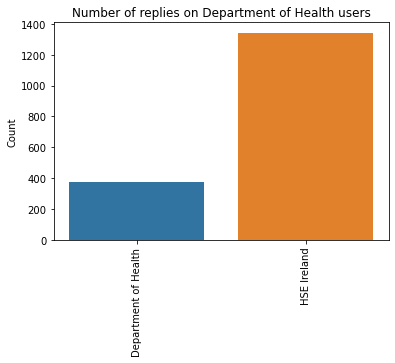

In [86]:
in_reply = df_users[df_users.username.str.lower().isin(pd.Series(user_health))].author_id

cond = (~df_tweets.in_reply_to_user_id.isna()) & (df_tweets['in_reply_to_user_id'].isin(in_reply) & (df_tweets['in_reply_to_user_id']!=df_tweets['author_id']))
dt_tweet_h_replies = df_tweets[cond]

dt_tweet_h_replies = dt_tweet_h_replies.merge(df_users.rename(columns={'author_id':'in_reply_to_user_id'}), how='left', on='in_reply_to_user_id')

print(dt_tweet_h_replies.shape)
display(dt_tweet_h_replies.head(2))

sns.countplot(x='name', data=dt_tweet_h_replies.sort_values(by='name'))
plt.title("Number of replies on Department of Health users")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.plot()

In [331]:
df_tweets[df_tweets['tweet_len']<=5][['tweet_id','author_id','token_tweet','cleaned_text']].head(20)

,tweet_id,author_id,token_tweet,cleaned_text
3927,1344286276107833344,2445568407,[agree],Agree 100%
4127,1379379835844317187,934880168,[liars],Liars
4168,1380268022334689281,839827174152622080,[joke],Joke
4185,1380186402697195524,1277222061778272256,[or],Or 1/10th ...
4323,1391672217558212612,827862510195847168,[pain],Pain
4449,1250022250092396546,832573646392680448,[lies],Lies
4479,1249953557949878277,749613574134304768,[good],Good!
4669,1251949802197262338,1073228151352901632,[than],Than
4892,1302618195615010819,965506447311298560,"[it, is]",It is
5188,1317894764101029888,1311922955912458240,[ever],*ever


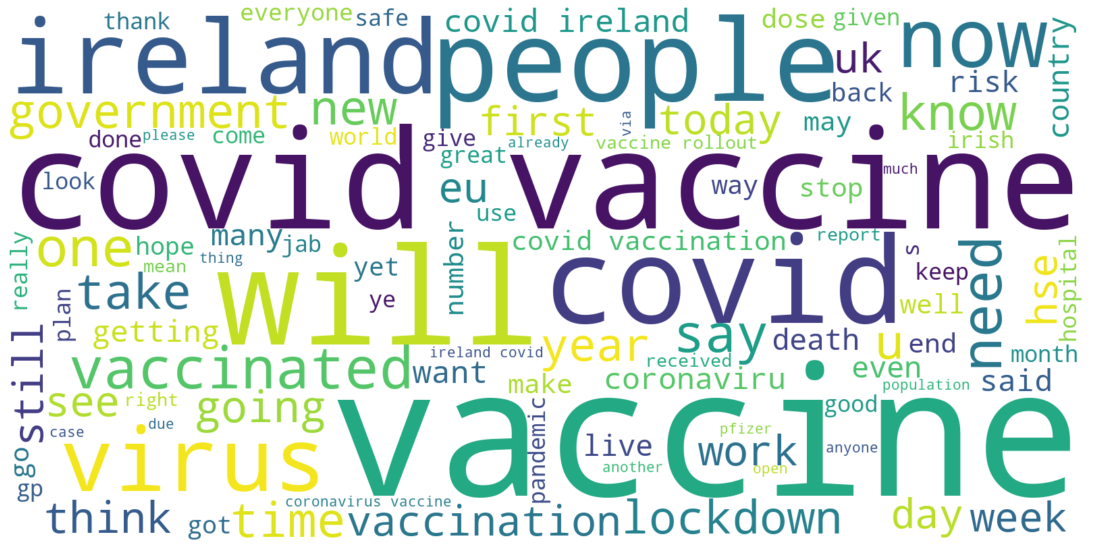

In [127]:
mybig_opinion = ' '.join(df_tweets['token_tweet'].apply(lambda s: ' '.join(s)))
cloud_myopinion = WordCloud(background_color="white", max_words=100, width=1600, height=800).generate(mybig_opinion)

plt.figure( figsize=(15,8))
plt.imshow(cloud_myopinion, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

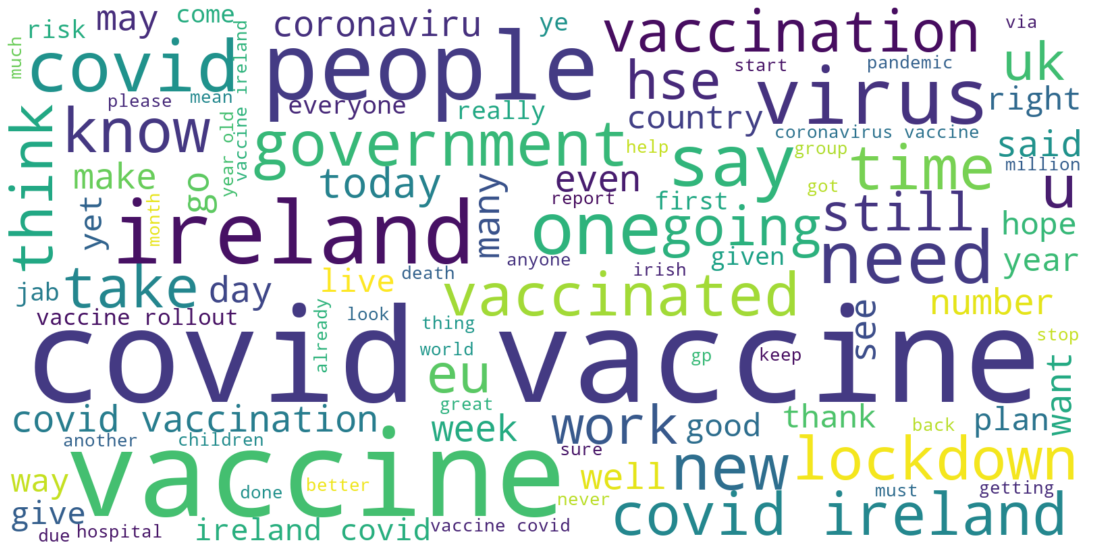

In [128]:
mybig_opinion = ' '.join(df_tweets['token_tweet_nostop'].apply(lambda s: ' '.join(s)))
cloud_myopinion = WordCloud(background_color="white", max_words=100, width=1600, height=800).generate(mybig_opinion)

plt.figure( figsize=(15,8))
plt.imshow(cloud_myopinion, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()